In [1]:
%pylab inline

import pandas as pd
import seaborn

%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")

Populating the interactive namespace from numpy and matplotlib


Theoretical complexity is one thing, but what about empirical complexity? Let's look at the models we might use for classification and see how they do on large datasets

In [2]:
from sklearn import datasets, preprocessing

# the mnist dataset has about 70,000 observations and 784 features.
# It's perfect for what we want to do: test the empirical complexity of various models 
digits = datasets.fetch_mldata('MNIST original')
x = digits.data
y = digits.target

#note: the object of this exercise is to test runtime, 
# so we can break the rules and ignore cross validation this one time
x = preprocessing.MinMaxScaler().fit_transform(x)

# mnist isn't shuffled by default so let's shuffle x and y
indices = np.random.choice(len(y), size=len(y), replace=False)
x = x[indices, :]; y = y[indices]

/home/soph/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn import svm, ensemble, linear_model, neighbors, naive_bayes

model_dict = {
    "svm-linearSVC": svm.LinearSVC(),
    "svm-rbf": svm.SVC(),
    "svm-poly3": svm.SVC(kernel="poly"),
    "random-forest": ensemble.RandomForestClassifier(),
    "logistic": linear_model.LogisticRegression(),
    "knn": neighbors.KNeighborsClassifier(),
    "nb": naive_bayes.GaussianNB()
}

In [4]:
import timeit

num_loops = 10
num_repeats = 1
num_tests = 20
max_samples = 4000
max_features = 100

# build a dictionary that includes two empty lists for each model
time_dict = dict()
for model_name in model_dict.keys():
    time_dict[model_name] = {
        "train": [],
        "test": []
    }

# set up the list of the different sizes we want to try
samples = np.linspace(50,max_samples, num=num_tests, dtype=int)

# loop through each training/test set size
for n_samp in samples:
    print(f"running for {n_samp} samples")
    
    #loop through each model
    for model_name in model_dict.keys():
        
        #pull the model out
        c_model = model_dict[model_name]
        
        # we take the min of the repeats because variation is likely due not to python execution 
        # but other operations https://docs.python.org/3/library/timeit.html#timeit.Timer.repeat
        train_time = np.min(
            timeit.repeat(
                f'c_model.fit(x[:n_samp,:max_features],y[:n_samp])',
                globals=globals(),
                repeat=num_repeats,
                number=num_loops))
        time_dict[model_name]["train"].append(train_time)
        
        test_time = np.min(
            timeit.repeat(
                f'c_model.predict(x[:n_samp,:max_features])',
                globals=globals(),
                repeat=num_repeats,
                number=num_loops))
        time_dict[model_name]["test"].append(test_time)

running for 50 samples
running for 257 samples
running for 465 samples
running for 673 samples
running for 881 samples
running for 1089 samples
running for 1297 samples
running for 1505 samples
running for 1713 samples
running for 1921 samples
running for 2128 samples
running for 2336 samples
running for 2544 samples
running for 2752 samples
running for 2960 samples
running for 3168 samples
running for 3376 samples
running for 3584 samples
running for 3792 samples
running for 4000 samples


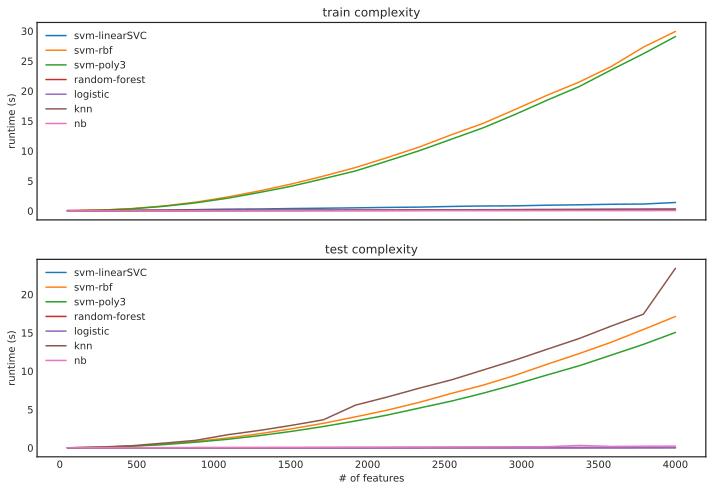

In [8]:
fig, axes = plt.subplots(nrows=2, figsize=(12,8), sharex=True)
train_ax = axes[0]
test_ax = axes[1]

for model_name in model_dict.keys():
    train_ax.plot(samples, time_dict[model_name]["train"], label=model_name)
    train_ax.set_title("train complexity")
    train_ax.set_ylabel("runtime (s)")
    
    train_ax.legend()
    test_ax.plot(samples, time_dict[model_name]["test"], label=model_name)
    test_ax.set_title("test complexity")
    test_ax.set_ylabel("runtime (s)")
    test_ax.set_xlabel("# of features")
    test_ax.legend()

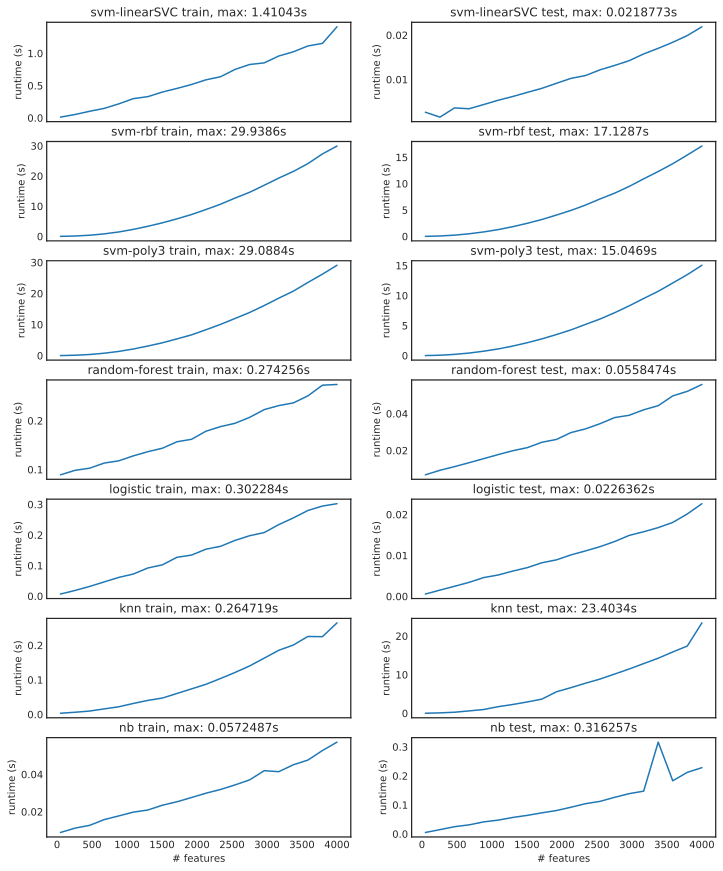

In [15]:
fig, axes = plt.subplots(nrows=len(model_dict.keys()), ncols=2, figsize=(12,15), sharex=True)


for i, model_name in enumerate(model_dict.keys()):
    axes[i,0].plot(samples, time_dict[model_name]["train"], label=model_name)
    axes[i,0].set_title(f"{model_name} train, max: {np.max(time_dict[model_name]['train']):g}s")
    axes[i,0].set_ylabel("runtime (s)")
    axes[i,1].plot(samples, time_dict[model_name]["test"], label=model_name)
    axes[i,1].set_title(f"{model_name} test, max: {np.max(time_dict[model_name]['test']):g}s")
    axes[i,1].set_ylabel("runtime (s)")
axes[-1,0].set_xlabel("# features")
axes[-1,1].set_xlabel("# features");